In [24]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
repo_root = os.popen('git rev-parse --show-toplevel').read().strip()

In [26]:
data_folder = os.path.join(repo_root, 'multi-parameter-estimation', 'data')

# Get list of data directories
data_dirs = os.listdir(data_folder)
data_dirs = [d for d in data_dirs if os.path.isdir(os.path.join(data_folder, d))]
data_dirs.sort()
data_dirs

['2025-05-28--14h-06m-26s',
 '2025-05-28--14h-08m-47s',
 '2025-05-28--14h-11m-10s',
 '2025-05-28--14h-13m-33s',
 '2025-05-28--14h-15m-56s',
 '2025-05-28--14h-18m-20s',
 '2025-05-28--14h-20m-43s',
 '2025-05-28--14h-23m-06s',
 '2025-05-28--14h-25m-29s',
 '2025-05-28--14h-27m-45s']

In [27]:
def load_estimates_and_params(data_dir):
    params = pd.read_csv(os.path.join(data_folder, data_dir, "params.csv"))
    estimates = pd.read_csv(os.path.join(data_folder, data_dir, "estimators.csv"))
    estimates["data_dir"] = data_dir
    estimates["theta"] = params["theta"].values[0]
    estimates["delta_phi"] = params["delta_phi"].values[0]
    estimates["repetitions"] = params["repetitions"].values[0]
    return estimates

# Load estimates and parameters for each data directory
estimates_list = []
for data_dir in data_dirs:
    # Skip the directories with no estimates
    if not os.path.exists(os.path.join(data_folder, data_dir, "estimators.csv")):
        continue
    estimates = load_estimates_and_params(data_dir)
    estimates_list.append(estimates)
# Concatenate all estimates into a single DataFrame
estimates_df = pd.concat(estimates_list, ignore_index=True)
estimates_df

,data_dir,C,DB_H,DB_V,SB,N,repetition,theta_estimate,delta_phi_estimate,theta,delta_phi,repetitions
0,2025-05-28--14h-06m-26s,2.0,38.0,0.0,0.0,40.0,NaN,0.267378,1.570796,0.000000,0,2000
1,2025-05-28--14h-06m-26s,1.0,39.0,0.0,0.0,40.0,NaN,0.142615,1.570796,0.000000,0,2000
2,2025-05-28--14h-06m-26s,0.0,40.0,0.0,0.0,40.0,NaN,0.000000,NaN,0.000000,0,2000
3,2025-05-28--14h-06m-26s,0.0,40.0,0.0,0.0,40.0,NaN,0.000000,NaN,0.000000,0,2000
4,2025-05-28--14h-06m-26s,1.0,39.0,0.0,0.0,40.0,NaN,0.142615,1.570796,0.000000,0,2000
...,...,...,...,...,...,...,...,...,...,...,...,...
291,2025-05-28--14h-25m-29s,3.0,1.0,148.0,8.0,160.0,NaN,2.772739,0.542809,2.792527,0,2000
292,2025-05-28--14h-25m-29s,1.0,0.0,188.0,11.0,200.0,NaN,2.838154,0.288723,2.792527,0,2000
293,2025-05-28--14h-25m-29s,4.5,1.0,186.0,8.5,200.0,NaN,2.790758,0.621895,2.792527,0,2000
294,2025-05-28--14h-25m-29s,33.0,1.0,2030.0,116.5,2180.5,124129.0,2.807447,0.482897,2.792527,0,2000


In [28]:
estimates_df["theta_degrees"] = np.degrees(estimates_df["theta"])
estimates_df["delta_phi_degrees"] = np.degrees(estimates_df["delta_phi"])
estimates_df

,data_dir,C,DB_H,DB_V,SB,N,repetition,theta_estimate,delta_phi_estimate,theta,delta_phi,repetitions,theta_degrees,delta_phi_degrees
0,2025-05-28--14h-06m-26s,2.0,38.0,0.0,0.0,40.0,NaN,0.267378,1.570796,0.000000,0,2000,0.0,0.0
1,2025-05-28--14h-06m-26s,1.0,39.0,0.0,0.0,40.0,NaN,0.142615,1.570796,0.000000,0,2000,0.0,0.0
2,2025-05-28--14h-06m-26s,0.0,40.0,0.0,0.0,40.0,NaN,0.000000,NaN,0.000000,0,2000,0.0,0.0
3,2025-05-28--14h-06m-26s,0.0,40.0,0.0,0.0,40.0,NaN,0.000000,NaN,0.000000,0,2000,0.0,0.0
4,2025-05-28--14h-06m-26s,1.0,39.0,0.0,0.0,40.0,NaN,0.142615,1.570796,0.000000,0,2000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,2025-05-28--14h-25m-29s,3.0,1.0,148.0,8.0,160.0,NaN,2.772739,0.542809,2.792527,0,2000,160.0,0.0
292,2025-05-28--14h-25m-29s,1.0,0.0,188.0,11.0,200.0,NaN,2.838154,0.288723,2.792527,0,2000,160.0,0.0
293,2025-05-28--14h-25m-29s,4.5,1.0,186.0,8.5,200.0,NaN,2.790758,0.621895,2.792527,0,2000,160.0,0.0
294,2025-05-28--14h-25m-29s,33.0,1.0,2030.0,116.5,2180.5,124129.0,2.807447,0.482897,2.792527,0,2000,160.0,0.0


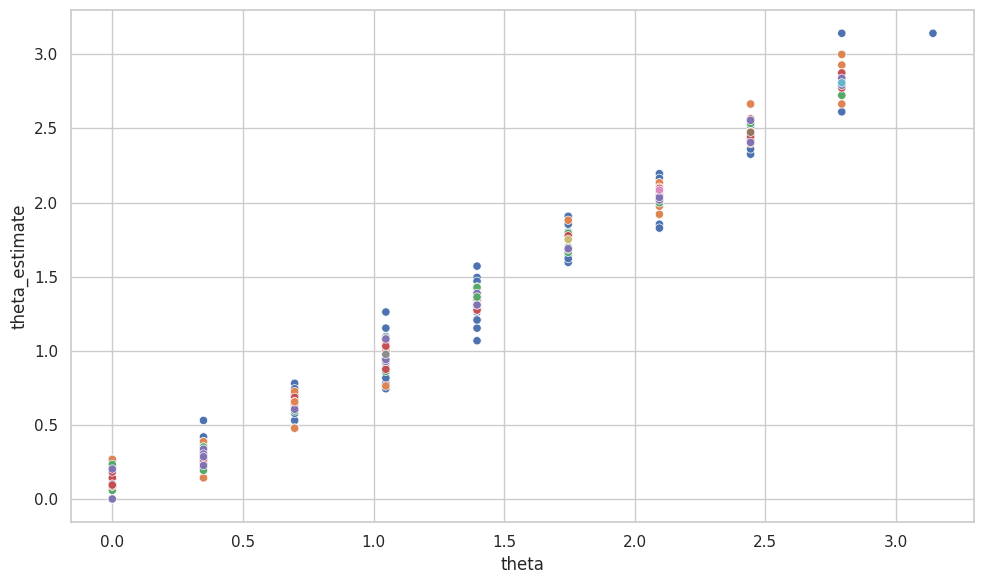

In [29]:
# plot the theta estimate against theta

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(data=estimates_df, x="theta", y="theta_estimate", hue="N", palette="deep")

# no legend
plt.legend([], [], frameon=False)

plt.tight_layout()
file_name = os.path.join(repo_root, "multi-parameter-estimation", "post-processing", "theta_estimate_vs_true_theta.png")
plt.savefig(file_name, dpi=300)
plt.show()

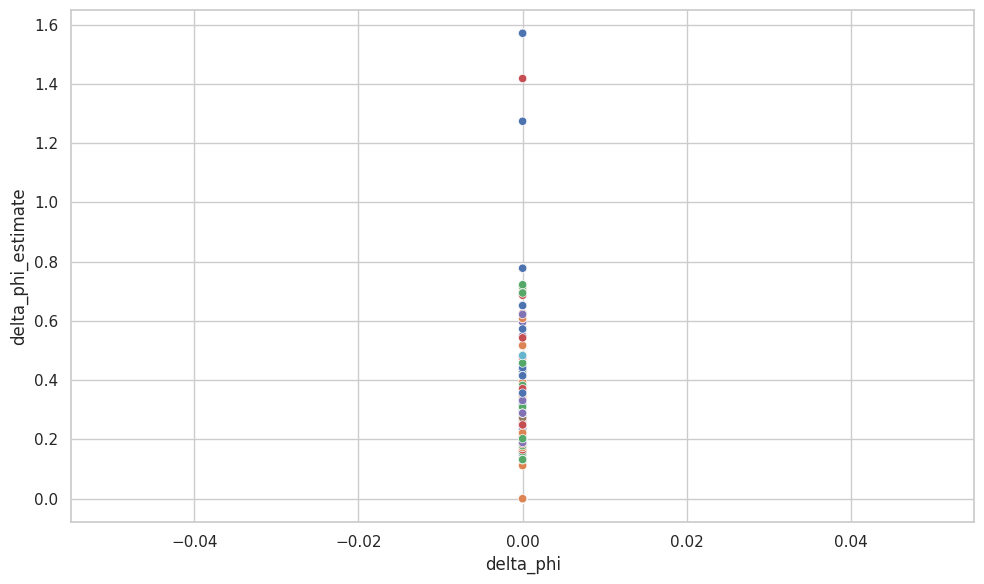

In [30]:
# plot the theta estimate against theta
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(data=estimates_df, x="delta_phi", y="delta_phi_estimate", hue="N", palette="deep")

# no legend
plt.legend([], [], frameon=False)

plt.tight_layout()

# save the figure
file_name = os.path.join(repo_root, "multi-parameter-estimation", "post-processing", "delta_phi_estimate_vs_true_delta_phi.png")
plt.savefig(file_name, dpi=300)
plt.show()

In [31]:
estimates_summary_df = estimates_df.groupby(["data_dir", "N"]).agg({
    "theta_estimate": ["mean", "std", "var"],
    "delta_phi_estimate": ["mean", "std", "var"],
    "theta": ["mean"],
    "delta_phi": ["mean"]
}).reset_index().rename(columns={"data_dir": "Data Directory"})
estimates_summary_df

Data Directory       N theta_estimate                      \
                                              mean       std       var   
0   2025-05-28--14h-06m-26s    40.0       0.129238  0.103632  0.010740   
1   2025-05-28--14h-06m-26s    80.0       0.104787  0.116930  0.013673   
2   2025-05-28--14h-06m-26s   120.0       0.115326  0.089378  0.007989   
3   2025-05-28--14h-06m-26s   160.0       0.124771  0.046158  0.002131   
4   2025-05-28--14h-06m-26s   200.0       0.100887  0.100930  0.010187   
5   2025-05-28--14h-06m-26s  2299.5       0.094038       NaN       NaN   
6   2025-05-28--14h-08m-47s    40.0       0.282632  0.112719  0.012706   
7   2025-05-28--14h-08m-47s    80.0       0.292523  0.082775  0.006852   
8   2025-05-28--14h-08m-47s   120.0       0.296463  0.066684  0.004447   
9   2025-05-28--14h-08m-47s   160.0       0.288320  0.040887  0.001672   
10  2025-05-28--14h-08m-47s   200.0       0.288325  0.056522  0.003195   
11  2025-05-28--14h-08m-47s  2357.0       0.284990       NaN       NaN   
12  2025-05-28--14h-11m-10s    40.0       0.632798  0.124682  0.015545   
13  2025-05-28--14h-11m-10s    80.0       0.626842  0.091894  0.008444   
14  2025-05-28--14h-11m-10s   120.0       0.645752  0.045935  0.002110   
15  2025-05-28--14h-11m-10s   160.0       0.664916  0.029090  0.000846   
16  2025-05-28--14h-11m-10s   200.0       0.631106  0.036504  0.001333   
17  2025-05-28--14h-11m-10s  2194.5       0.655181       NaN       NaN   
18  2025-05-28--14h-13m-33s    40.0       0.968393  0.120200  0.014448   
19  2025-05-28--14h-13m-33s    80.0       0.971990  0.082164  0.006751   
20  2025-05-28--14h-13m-33s   120.0       0.974014  0.070380  0.004953   
21  2025-05-28--14h-13m-33s   160.0       0.977230  0.064248  0.004128   
22  2025-05-28--14h-13m-33s   200.0       0.977197  0.069174  0.004785   
23  2025-05-28--14h-13m-33s  2179.0       0.975812       NaN       NaN   
24  2025-05-28--14h-15m-56s    40.0       1.332936  0.136446  0.018617   
25  2025-05-28--14h-15m-56s    80.0       1.328686  0.068213  0.004653   
26  2025-05-28--14h-15m-56s   120.0       1.334833  0.056327  0.003173   
27  2025-05-28--14h-15m-56s   160.0       1.311879  0.036176  0.001309   
28  2025-05-28--14h-15m-56s   200.0       1.334961  0.045086  0.002033   
29  2025-05-28--14h-15m-56s  2203.5       1.362422       NaN       NaN   
30  2025-05-28--14h-18m-20s    40.0       1.718880  0.109603  0.012013   
31  2025-05-28--14h-18m-20s    80.0       1.730828  0.100361  0.010072   
32  2025-05-28--14h-18m-20s   120.0       1.718204  0.066620  0.004438   
33  2025-05-28--14h-18m-20s   160.0       1.730262  0.063643  0.004050   
34  2025-05-28--14h-18m-20s   200.0       1.687814       NaN       NaN   
35  2025-05-28--14h-18m-20s  2180.0       1.750593       NaN       NaN   
36  2025-05-28--14h-20m-43s    40.0       2.046022  0.107634  0.011585   
37  2025-05-28--14h-20m-43s    80.0       2.044405  0.074601  0.005565   
38  2025-05-28--14h-20m-43s   120.0       2.043676  0.039981  0.001598   
39  2025-05-28--14h-20m-43s   160.0       2.055026  0.036931  0.001364   
40  2025-05-28--14h-20m-43s   200.0       2.043531  0.032535  0.001059   
41  2025-05-28--14h-20m-43s  2152.5       2.084020       NaN       NaN   
42  2025-05-28--14h-23m-06s    40.0       2.480696  0.109990  0.012098   
43  2025-05-28--14h-23m-06s    80.0       2.477778  0.087433  0.007644   
44  2025-05-28--14h-23m-06s   120.0       2.478386  0.064308  0.004136   
45  2025-05-28--14h-23m-06s   160.0       2.478772  0.074117  0.005493   
46  2025-05-28--14h-23m-06s   200.0       2.479953  0.105253  0.011078   
47  2025-05-28--14h-23m-06s  2142.0       2.474068       NaN       NaN   
48  2025-05-28--14h-25m-29s    40.0       2.840281  0.150542  0.022663   
49  2025-05-28--14h-25m-29s    80.0       2.834484  0.130790  0.017106   
50  2025-05-28--14h-25m-29s   120.0       2.823846  0.087242  0.007611   
51  2025-05-28--14h-25m-29s   160.0       2.823477  0.071755  0.005149   
52  2025-05-28--1

In [32]:
estimates_summary_df["2_n_var"] = estimates_summary_df["N"] * 2 * estimates_summary_df["theta_estimate"]["var"]
estimates_summary_df["theta_error"] = estimates_summary_df["theta_estimate"]["mean"] - estimates_summary_df["theta"]["mean"]
estimates_summary_df["root_n_theta_error"] = np.sqrt(estimates_summary_df["N"]) * estimates_summary_df["theta_error"]
estimates_summary_df

Data Directory       N theta_estimate                      \
                                              mean       std       var   
0   2025-05-28--14h-06m-26s    40.0       0.129238  0.103632  0.010740   
1   2025-05-28--14h-06m-26s    80.0       0.104787  0.116930  0.013673   
2   2025-05-28--14h-06m-26s   120.0       0.115326  0.089378  0.007989   
3   2025-05-28--14h-06m-26s   160.0       0.124771  0.046158  0.002131   
4   2025-05-28--14h-06m-26s   200.0       0.100887  0.100930  0.010187   
5   2025-05-28--14h-06m-26s  2299.5       0.094038       NaN       NaN   
6   2025-05-28--14h-08m-47s    40.0       0.282632  0.112719  0.012706   
7   2025-05-28--14h-08m-47s    80.0       0.292523  0.082775  0.006852   
8   2025-05-28--14h-08m-47s   120.0       0.296463  0.066684  0.004447   
9   2025-05-28--14h-08m-47s   160.0       0.288320  0.040887  0.001672   
10  2025-05-28--14h-08m-47s   200.0       0.288325  0.056522  0.003195   
11  2025-05-28--14h-08m-47s  2357.0       0.284990       NaN       NaN   
12  2025-05-28--14h-11m-10s    40.0       0.632798  0.124682  0.015545   
13  2025-05-28--14h-11m-10s    80.0       0.626842  0.091894  0.008444   
14  2025-05-28--14h-11m-10s   120.0       0.645752  0.045935  0.002110   
15  2025-05-28--14h-11m-10s   160.0       0.664916  0.029090  0.000846   
16  2025-05-28--14h-11m-10s   200.0       0.631106  0.036504  0.001333   
17  2025-05-28--14h-11m-10s  2194.5       0.655181       NaN       NaN   
18  2025-05-28--14h-13m-33s    40.0       0.968393  0.120200  0.014448   
19  2025-05-28--14h-13m-33s    80.0       0.971990  0.082164  0.006751   
20  2025-05-28--14h-13m-33s   120.0       0.974014  0.070380  0.004953   
21  2025-05-28--14h-13m-33s   160.0       0.977230  0.064248  0.004128   
22  2025-05-28--14h-13m-33s   200.0       0.977197  0.069174  0.004785   
23  2025-05-28--14h-13m-33s  2179.0       0.975812       NaN       NaN   
24  2025-05-28--14h-15m-56s    40.0       1.332936  0.136446  0.018617   
25  2025-05-28--14h-15m-56s    80.0       1.328686  0.068213  0.004653   
26  2025-05-28--14h-15m-56s   120.0       1.334833  0.056327  0.003173   
27  2025-05-28--14h-15m-56s   160.0       1.311879  0.036176  0.001309   
28  2025-05-28--14h-15m-56s   200.0       1.334961  0.045086  0.002033   
29  2025-05-28--14h-15m-56s  2203.5       1.362422       NaN       NaN   
30  2025-05-28--14h-18m-20s    40.0       1.718880  0.109603  0.012013   
31  2025-05-28--14h-18m-20s    80.0       1.730828  0.100361  0.010072   
32  2025-05-28--14h-18m-20s   120.0       1.718204  0.066620  0.004438   
33  2025-05-28--14h-18m-20s   160.0       1.730262  0.063643  0.004050   
34  2025-05-28--14h-18m-20s   200.0       1.687814       NaN       NaN   
35  2025-05-28--14h-18m-20s  2180.0       1.750593       NaN       NaN   
36  2025-05-28--14h-20m-43s    40.0       2.046022  0.107634  0.011585   
37  2025-05-28--14h-20m-43s    80.0       2.044405  0.074601  0.005565   
38  2025-05-28--14h-20m-43s   120.0       2.043676  0.039981  0.001598   
39  2025-05-28--14h-20m-43s   160.0       2.055026  0.036931  0.001364   
40  2025-05-28--14h-20m-43s   200.0       2.043531  0.032535  0.001059   
41  2025-05-28--14h-20m-43s  2152.5       2.084020       NaN       NaN   
42  2025-05-28--14h-23m-06s    40.0       2.480696  0.109990  0.012098   
43  2025-05-28--14h-23m-06s    80.0       2.477778  0.087433  0.007644   
44  2025-05-28--14h-23m-06s   120.0       2.478386  0.064308  0.004136   
45  2025-05-28--14h-23m-06s   160.0       2.478772  0.074117  0.005493   
46  2025-05-28--14h-23m-06s   200.0       2.479953  0.105253  0.011078   
47  2025-05-28--14h-23m-06s  2142.0       2.474068       NaN       NaN   
48  2025-05-28--14h-25m-29s    40.0       2.840281  0.150542  0.022663   
49  2025-05-28--14h-25m-29s    80.0       2.834484  0.130790  0.017106   
50  2025-05-28--14h-25m-29s   120.0       2.823846  0.087242  0.007611   
51  2025-05-28--14h-25m-29s   160.0       2.823477  0.071755  0.005149   
52  2025-05-28--1

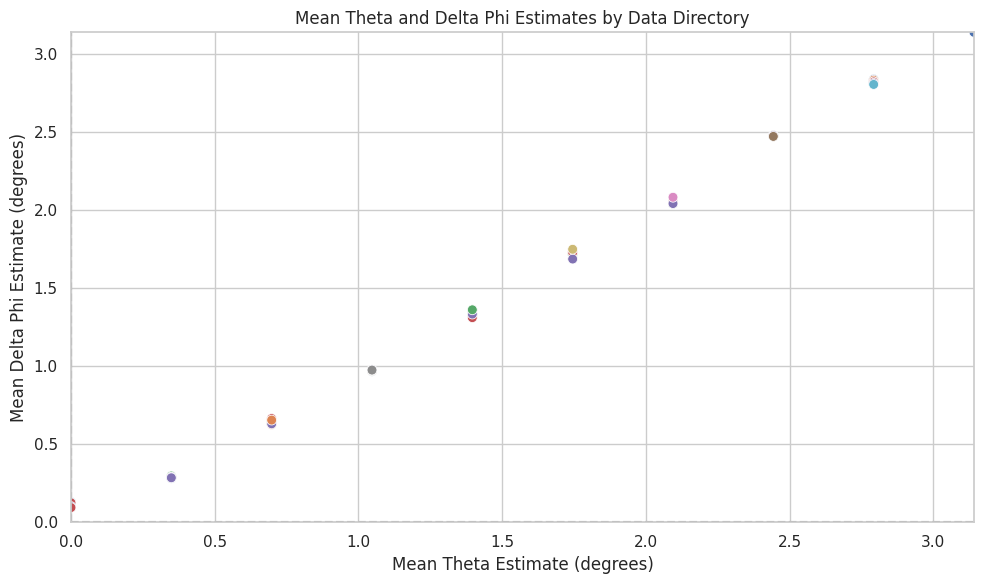

In [33]:
# plot the means as a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=estimates_summary_df, x=("theta", "mean"),
                y=("theta_estimate", "mean"),
                hue="N", palette="deep", s=50)
plt.title("Mean Theta and Delta Phi Estimates by Data Directory")
plt.xlabel("Mean Theta Estimate (degrees)")
plt.ylabel("Mean Delta Phi Estimate (degrees)")
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.xlim(0, np.pi)
plt.ylim(0, np.pi)
# no legend
plt.legend([], [], frameon=False)
plt.tight_layout()
file_name = os.path.join(repo_root, "multi-parameter-estimation", "post-processing", "mean_theta_delta_phi_estimates_by_data_dir.png")
plt.savefig(file_name, dpi=300)
plt.show()

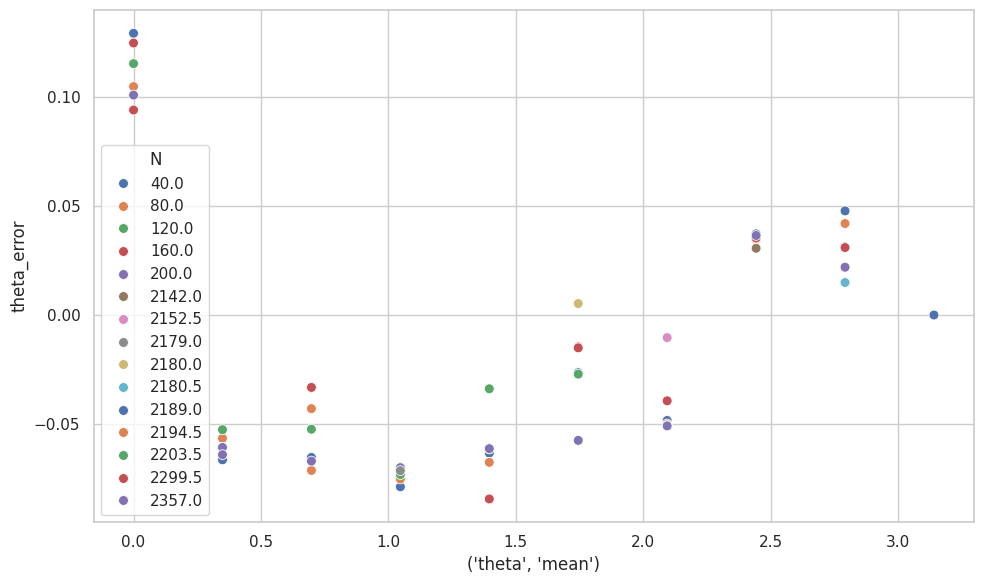

In [34]:

plt.figure(figsize=(10, 6))
sns.scatterplot(data=estimates_summary_df, x=("theta", "mean"),
                y=("theta_error"),
                hue="N", palette="deep", s=50)


plt.tight_layout()
file_name = os.path.join(repo_root, "multi-parameter-estimation", "post-processing", "mean_theta_error_by_data_dir.png")
plt.savefig(file_name, dpi=300)
plt.show()

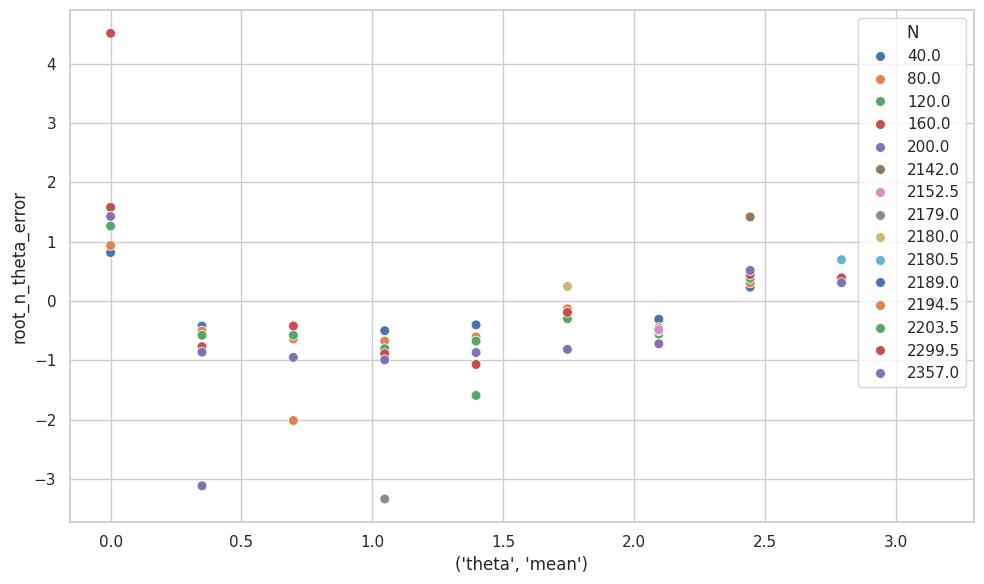

In [35]:

plt.figure(figsize=(10, 6))
sns.scatterplot(data=estimates_summary_df, x=("theta", "mean"),
                y=("root_n_theta_error"),
                hue="N", palette="deep", s=50)


plt.tight_layout()
file_name = os.path.join(repo_root, "multi-parameter-estimation", "post-processing", "mean_theta_error_by_data_dir.png")
plt.savefig(file_name, dpi=300)
plt.show()

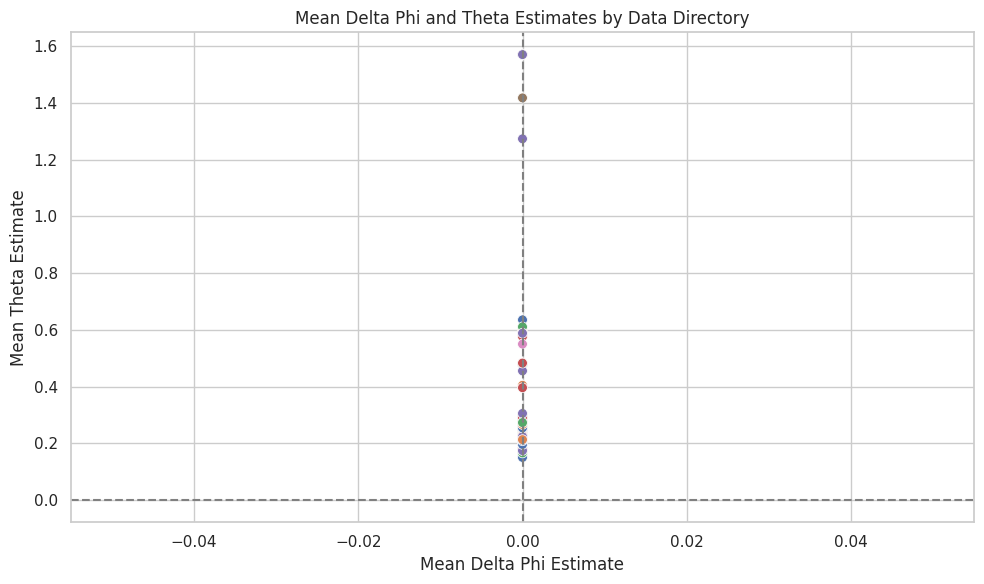

In [36]:
# plot the means as a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=estimates_summary_df, x=("delta_phi", "mean"),
                y=("delta_phi_estimate", "mean"),
                hue=estimates_summary_df["N"].astype(str),
                palette="deep", s=50)
plt.title("Mean Delta Phi and Theta Estimates by Data Directory")
plt.xlabel("Mean Delta Phi Estimate")
plt.ylabel("Mean Theta Estimate")
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')

# no legend
plt.legend([], [], frameon=False)
plt.tight_layout()
file_name = os.path.join(repo_root, "multi-parameter-estimation", "post-processing", "mean_delta_phi_theta_estimates_by_data_dir.png")
plt.savefig(file_name, dpi=300)
plt.show()

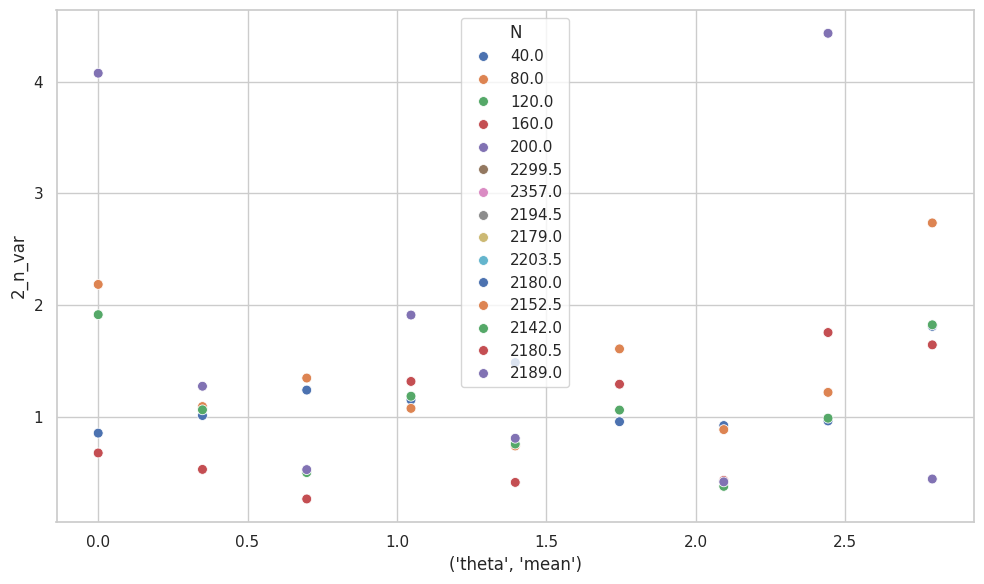

In [37]:
# plot the variances against the true value of theta as a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=estimates_summary_df, x=("theta", "mean"), y=("2_n_var"),
                hue=estimates_summary_df["N"].astype(str),
                palette="deep", s=50)


plt.tight_layout()
file_name = os.path.join(repo_root, "multi-parameter-estimation", "post-processing", "variance_theta_delta_phi_estimates_by_data_dir.png")
plt.savefig(file_name, dpi=300)
plt.show()

# Best guess estimators 

Using all samples in the data_dir to estimate

In [38]:
# Row of max N in each data_dir
estimates_summary_df["max_N"] = estimates_summary_df.groupby("Data Directory")["N"].transform("max")
# Filter to keep only the rows with the maximum N for each data_dir
best_guess_estimators = estimates_summary_df[estimates_summary_df["N"] == estimates_summary_df["max_N"]].reset_index(drop=True)

best_guess_estimators


Data Directory       N theta_estimate         delta_phi_estimate  \
                                             mean std var               mean   
0  2025-05-28--14h-06m-26s  2299.5       0.094038 NaN NaN           1.418083   
1  2025-05-28--14h-08m-47s  2357.0       0.284990 NaN NaN           0.549856   
2  2025-05-28--14h-11m-10s  2194.5       0.655181 NaN NaN           0.299592   
3  2025-05-28--14h-13m-33s  2179.0       0.975812 NaN NaN           0.228797   
4  2025-05-28--14h-15m-56s  2203.5       1.362422 NaN NaN           0.208143   
5  2025-05-28--14h-18m-20s  2180.0       1.750593 NaN NaN           0.195859   
6  2025-05-28--14h-20m-43s  2152.5       2.084020 NaN NaN           0.212818   
7  2025-05-28--14h-23m-06s  2142.0       2.474068 NaN NaN           0.272914   
8  2025-05-28--14h-25m-29s  2180.5       2.807447 NaN NaN           0.482897   
9  2025-05-28--14h-27m-45s  2189.0       3.141593 NaN NaN           1.273781   

              theta delta_phi 2_n_var theta_error root_n_theta_error   max_N  
  std var      mean      mean                                                 
0 NaN NaN  0.000000       0.0     NaN    0.094038           4.509410  2299.5  
1 NaN NaN  0.349066       0.0     NaN   -0.064076          -3.110800  2357.0  
2 NaN NaN  0.698132       0.0     NaN   -0.042951          -2.012041  2194.5  
3 NaN NaN  1.047198       0.0     NaN   -0.071385          -3.332248  2179.0  
4 NaN NaN  1.396263       0.0     NaN   -0.033842          -1.588570  2203.5  
5 NaN NaN  1.745329       0.0     NaN    0.005263           0.245753  2180.0  
6 NaN NaN  2.094395       0.0     NaN   -0.010375          -0.481333  2152.5  
7 NaN NaN  2.443461       0.0     NaN    0.030607           1.416549  2142.0  
8 NaN NaN  2.792527       0.0     NaN    0.014920           0.696716  2180.5  
9 NaN NaN  3.141593       0.0     NaN    0.000000           0.000000  2189.0

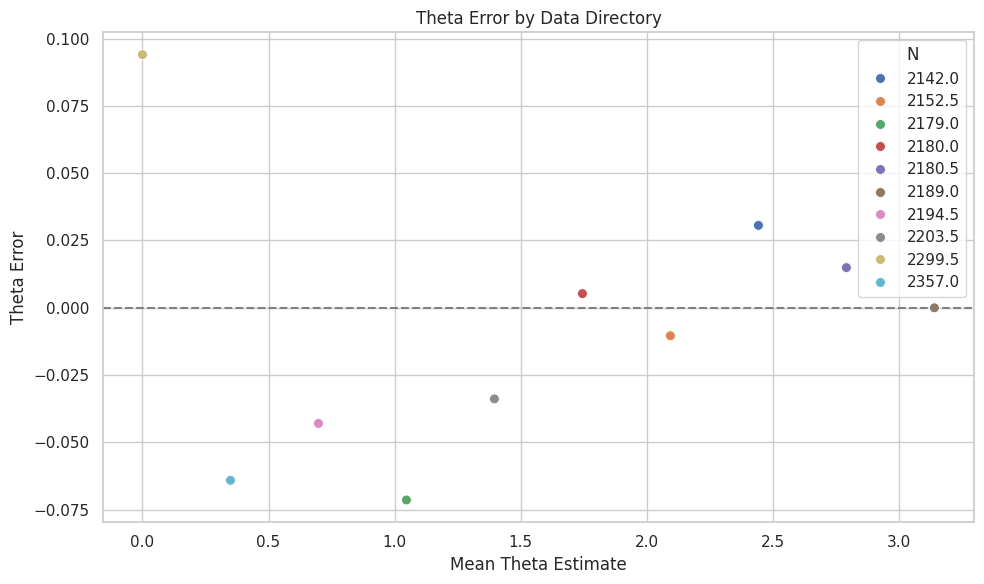

In [39]:
# plot the theta_error
plt.figure(figsize=(10, 6))
sns.scatterplot(data=best_guess_estimators, x=("theta", "mean"),
                y=("theta_error"),
                hue="N", palette="deep", s=50)
plt.title("Theta Error by Data Directory")
plt.xlabel("Mean Theta Estimate")
plt.ylabel("Theta Error")
plt.axhline(0, color='gray', linestyle='--')
plt.tight_layout()
file_name = os.path.join(repo_root, "multi-parameter-estimation", "post-processing", "best_guess_theta_error_by_data_dir.png")
plt.savefig(file_name, dpi=300)

plt.show()